¡Hola, Gloria!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Gloria! Tu trabajo es excelente, solo te hice un par de recomendaciones mínimas para mejorar algunas visualizaciones y te dejé un comentario acerca de un filtro que te faltó para usar los datos requeridos en la prueba de hipótesis. Una vez hayas atendido este último comentario principalmente, tu proyecto quedará aprobado. Quedo pendiente de tus dudas y comentarios.
</div>

# Análisis exploratorio de datos Python: Taxis en Chicago

**Descripción del proyecto**

Se analizaron dos datasets que contienen los datos de los recorridos hechos por distintas compañías de taxis en la ciudad de Chicago. Se toma en cuenta distintos puntos o barrios de la ciudad, así como también los tiempos que tardaron cada viaje y las condiciones metereológicas. Igualmente se realizará una prueba de hipótesis para probar si la lluvia afecta la duración de un viaje. 

**Descripción de datos**

/datasets/project_sql_result_01.csv. contiene los siguientes datos:
- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:
- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

- start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
- duration_seconds: duración del viaje en segundos



Para estos dos datasets ahora necesitas:
- importar los archivos
- estudiar los datos que contienen
- asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
- sacar conclusiones basadas en cada gráfico y explicar los resultados

## Tabla de Contenidos    

1. [Paso 1. Importar librerías y datasets](#1) 
1. [Paso 2. Análisis de datos](#2) 
1. [Paso 3. Prueba de hipótesis estadística](#3)     
1. [Paso 4. Conclusiones](#4)     

# 1.Importar librerías y datasets

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df_company_trips = pd.read_csv("/datasets/project_sql_result_01.csv")

In [3]:
df_loc_avg_trips = pd.read_csv("/datasets/project_sql_result_04.csv")

In [4]:
df_ohare = pd.read_csv("/datasets/project_sql_result_07.csv")

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con la carga de la información y las librerias necesarias para el análisis.

In [5]:
df_company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
df_company_trips.sample(10)

,company_name,trips_amount
21,American United,1404
22,Chicago Independents,1296
33,Metro Jet Taxi A,146
6,City Service,8448
34,Norshore Cab,127
23,KOAM Taxi Association,1259
46,3620 - 52292 David K. Cab Corp.,21
0,Flash Cab,19558
38,6743 - 78771 Luhak Corp,33
20,Checker Taxi,1486


In [7]:
df_loc_avg_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
df_loc_avg_trips.sample(10)

,dropoff_location_name,average_trips
1,River North,9523.666667
38,Armour Square,77.033333
2,Streeterville,6664.666667
35,Norwood Park,95.233333
6,Grant Park,2068.533333
5,Lake View,2420.966667
63,Andersonville,16.866667
44,Belmont Cragin,59.033333
93,Riverdale,1.800000
25,Irving Park,296.566667


In [9]:
df_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
df_ohare.sample(10)

,start_ts,weather_conditions,duration_seconds
355,2017-11-11 16:00:00,Good,2400.0
193,2017-11-25 05:00:00,Good,1487.0
534,2017-11-04 11:00:00,Good,2895.0
917,2017-11-18 05:00:00,Good,1568.0
208,2017-11-04 11:00:00,Good,2160.0
627,2017-11-11 04:00:00,Good,1140.0
1003,2017-11-18 08:00:00,Bad,1483.0
1005,2017-11-04 14:00:00,Good,2704.0
574,2017-11-04 11:00:00,Good,2531.0
242,2017-11-11 11:00:00,Good,2100.0


In [11]:
df_ohare["start_ts"] =  pd.to_datetime(df_ohare["start_ts"])

In [12]:
print(df_ohare["start_ts"].dtype)

datetime64[ns]


In [13]:
df_ohare["start_hour"] = df_ohare["start_ts"].dt.hour
df_ohare.insert(1,"start_hour", df_ohare.pop("start_hour"))

**Revisión de duplicados de datos**

In [14]:
df_company_trips.duplicated().sum()

0

In [15]:
df_loc_avg_trips.duplicated().sum()

0

In [16]:
df_ohare.duplicated().sum()

197

In [17]:
df_ohare_duplicated = df_ohare[df_ohare.duplicated(keep=False)]
df_ohare_duplicated

,start_ts,start_hour,weather_conditions,duration_seconds
4,2017-11-11 07:00:00,7,Good,1440.0
8,2017-11-11 14:00:00,14,Good,2460.0
10,2017-11-18 06:00:00,6,Good,1500.0
16,2017-11-04 12:00:00,12,Good,2640.0
23,2017-11-04 14:00:00,14,Good,3360.0
...,...,...,...,...
1054,2017-11-11 07:00:00,7,Good,1380.0
1058,2017-11-25 12:00:00,12,Good,1440.0
1062,2017-11-11 06:00:00,6,Good,1500.0
1065,2017-11-11 13:00:00,13,Good,2100.0


In [18]:
df_ohare = df_ohare.drop_duplicates()

In [19]:
df_ohare.duplicated().sum()

0

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Para estos análisis iniciales te recomiendo verificar duplicados
    


<div class="alert alert-block alert-info">
<b>Gracias Tonatiuh. Cierto es muy importante siempre revisar si hay duplicados. .</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

# 2.Análisis de datos

**Los 10 principales barrios en términos de finalización del recorrido**

In [20]:
top_10_droploc = df_loc_avg_trips.groupby("dropoff_location_name")["average_trips"].sum()
top_10 = top_10_droploc.sort_values(ascending=False).head(10)

<AxesSubplot:title={'center':'Number of trips per destination'}, ylabel='number of trips'>

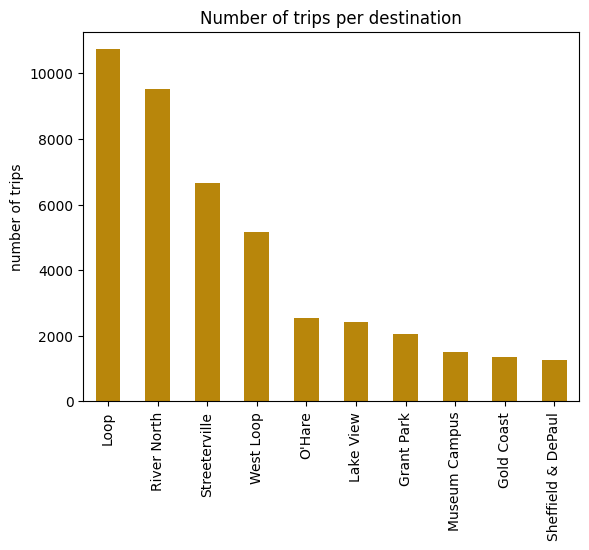

In [21]:
top_10.plot(kind="bar", color="darkgoldenrod", xlabel="", ylabel= "number of trips", title = "Number of trips per destination")

Con base en el gráfico de barras hallamos que hay 4 barrios que concentran una gran cantidad del destino de los viajes: Loop, River North, Streeterville y West Loop. El destino más popular es el centro de Chicago (Loop) en donde se concentran varias de sus actividades culturales, turísticas y de compras. Mientras que los otros tres barrios son cercanos a Loop, por lo que hay varios visitantes que se eligen su alojamiento de hotel en estas zonas. También tiene varias facilidades para hacer compras, una buena zona hotelera y restarurantes. 

Mientras que los otros destinos como O'Hare es conocida por ser la ubicación del Aeropuerto Internacional O'Hare, uno de los aeropuertos más grandes y concurridos de Estados Unidos. Lakeview es un vecindario muy popular, especialmente conocido por su proximidad al lago Michigan. Mientras que Grant Park es uno de los parques más famosos de Chicago. 

**Empresas de taxis y número de viajes**

In [22]:
top_10_company = df_company_trips.head(10)
top_10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


<AxesSubplot:title={'center':'Number of trips per most popular taxi company'}, ylabel='number of trips'>

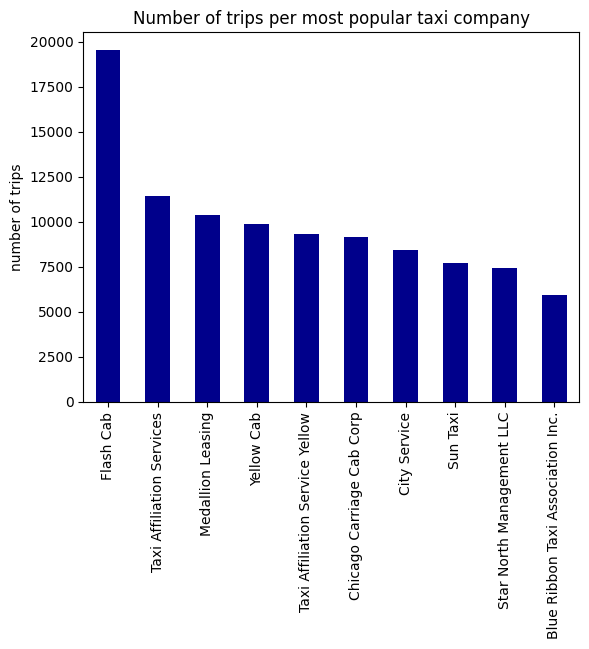

In [23]:
top_10_company.plot(kind="bar", x="company_name", legend="",color="darkblue", xlabel = "", ylabel= "number of trips", title = "Number of trips per most popular taxi company")

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el análisis gráfico y sus interpretaciones de los resultados

En el gráfico se ve reflejado una clara dominancia de la companía de taxis *Flash Cab*, la cual tiene registrado un total de casi 20,000 viajes en Chicago. En segundo lugar queda Taxi Affiliation Services con casi 12,500 viajes, seguido de Medallion Leasing con un poco más de 10,000 viajes. 

Echando un breve vistazo a la compañía *Flash Cab* es una empresa que opera solo en Chicago, Illinois desde 1945. Proporciona servicio para viajes hacia el aeropuerto y servicios de transporte corporativo. Cuenta con una aplicación móvil para facilitar las reservas de viajes por lo que esta empresa ha integrado el uso de aplicaciones. Por lo tanto, su liderazgo como empresa se puede deber a que es una empresa que ha innovado en la solicitud de taxis, la seguridad del pasajero y su larga historia como empresa local. 

In [24]:
top_middle_company = df_company_trips.iloc[26:36]
top_middle_company

,company_name,trips_amount
26,Gold Coast Taxi,428
27,Service Taxi Association,402
28,5 Star Taxi,310
29,303 Taxi,250
30,Setare Inc,230
31,American United Taxi Affiliation,210
32,Leonard Cab Co,147
33,Metro Jet Taxi A,146
34,Norshore Cab,127
35,6742 - 83735 Tasha Ride Inc,39


<AxesSubplot:title={'center':'Number of trips by moderately popular taxi companies'}, ylabel='number of trips'>

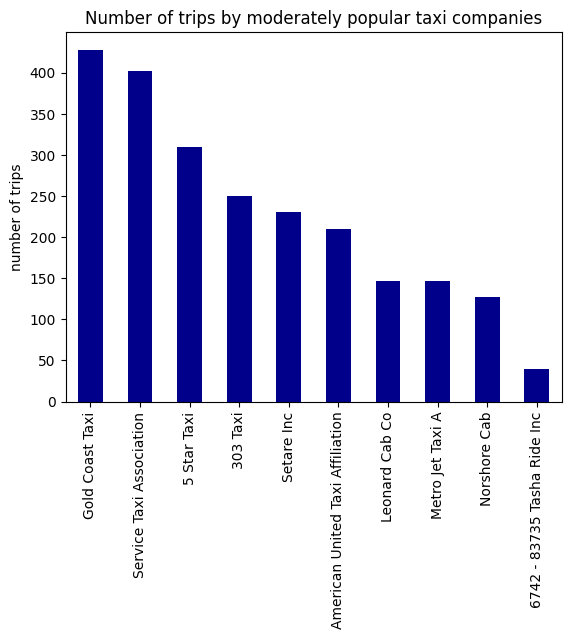

In [25]:
top_middle_company.plot(kind="bar", x="company_name", color="darkblue", legend = "", xlabel = "", ylabel= "number of trips", 
                        title = "Number of trips by moderately popular taxi companies")

Con esta gráfica se tiene por objetivo visualizar los datos de las compañías que se encuentran en medio del dataframe. Se puede notar que las otras compañias de viajes en taxi tiene signiicativamente menos operaciones, pero refleja que hay varias opciones para la población y visitantes de Chicago. Se podría concluir que mantienen casi la misma calidad en su servicio por el número de viajes que realizan en la Chicago. 

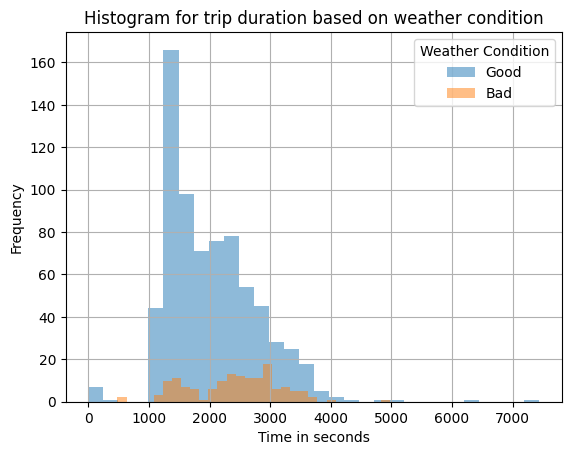

In [26]:
for condition in df_ohare["weather_conditions"].unique():
    data_condition = df_ohare[df_ohare["weather_conditions"] == condition]
    plt.hist(data_condition["duration_seconds"], bins=30, alpha=0.5, label=condition)
    
plt.xlabel("Time in seconds")
plt.ylabel("Frequency")
plt.title("Histogram for trip duration based on weather condition")
plt.legend(title="Weather Condition")
plt.grid(True)
plt.show()

En este histograma se revisa la frecuencia de la duración de los viajes dependiendo si el clima era bueno o malo. La diferencia es sorpresiva, ya que nos puede revelar que las personas que parten de Loop hacia el aeropuerto internacional de O'Hare toman más viajes en taxi con más frecuencia cuando el clima está en buenas condiciones. Igualmente la duración de los viajes en un buen clima tienen en su mayoría entre 1000 a 1500 segundos (entre 16 a 20 minutos). En cambio cuando el clima es malo se solicitan muchos menos viajes por taxi. Sin embargo, los pocos viajes que se realizan tardan más en llegar al destino, entre 2500 a 3000 segundos (40 a 50 minutos). 

# 3. Prueba de hipótesis estadística

- H0= La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.
- H1= La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
- Valor alpha = 0.05

In [27]:
#Filtración de datos 
df_saturdays_bad = df_ohare[(df_ohare["start_ts"].dt.weekday == 5) & (df_ohare["weather_conditions"] == "Bad")]
df_saturdays_good = df_ohare[(df_ohare["start_ts"].dt.weekday == 5) & (df_ohare["weather_conditions"] == "Good")]

In [29]:
# Prueba de las hipótesis 
alpha = 0.05


levene_test = st.levene(df_saturdays_bad["duration_seconds"], df_saturdays_good["duration_seconds"])

levene_pvalue = levene_test.pvalue

if levene_pvalue > alpha:
    equal_var = True  
    print("Las varianzas son iguales (p-valor de Levene:", levene_pvalue, ")")
else:
    equal_var = False  
    print("Las varianzas no son iguales (p-valor de Levene:", levene_pvalue, ")")

results_weather_conditions = st.ttest_ind(df_saturdays_bad["duration_seconds"], 
                                          df_saturdays_good["duration_seconds"], 
                                          equal_var=equal_var)

print("Valor p de la prueba t: ", results_weather_conditions.pvalue)

if results_weather_conditions.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Las varianzas son iguales (p-valor de Levene: 0.9806770360671218 )
Valor p de la prueba t:  7.397770692813658e-08
Rechazamos la hipótesis nula


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para esta prueba te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocas como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de los días (lluvioso y no lluvioso) debes de hacer uso de la siguiente función: 
    
    levene(df_saturdays_bad["duration_seconds"], df_saturdays_good["duration_seconds"])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var".  Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene.  
</div>

<div class="alert alert-block alert-info">
<b>Gracias. Solo había escuchado de la prueba de levene, pero aún no la había aplicado para las pruebas de hipótesis. Gracias a esto se corrobora que varibilidad de la dipersión de los dos conjuntos de datos y verificar que no afecte sus respectivas medias. .</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos!

**¿Cómo se planteó las hipótesis nula y alternativa qué criterio se utilizó para probar las hipótesis y por qué?**

La hipótesis nula se estableció en contraste con un mal clima en donde la lluvia pudo haber afectado los viajes en taxi los sábados. 
Se empleó un umbral de de significancia con nivel 0.05 por ser el más aceptado para las pruebas de hipótesis. Es un buen valor para un umbral porque permite hacer pruebas estadísticas sin ser ni demasiado estricto o relajado.
Se rechaza la hipótesis nula, por lo que se concluye que una mala condición de clima para viajar en taxi, como lo puede ser la lluvia, afecta la duración promedio de los viajes de manera significativa. 

# Conclusiones

En este análisis de los viajes en taxis de Chicago descubrimos varios puntos importantes: 
- La compañía más popular y utilizada es la empresa loccal *Flash Cab* la cual tiene más de 70 años, por lo que se ha establecido entre los habitantes como la empresa de taxis de su preferencia. Esta empresa, desde una breve revisión de su sitio web, se ha actualizado con la demanda tecnológica para asegurar su posición. 
- Los barrios cerca del centro de Chicago (Loop) son los destinos más populares. Por lo que es importante que las empresas de taxis aseguren servicios de calidad y eficientes. 
- La condición metereológica condiciona las cantidades de viajes en taxi, así como también su duración. Por lo tanto, a pesar de que las empresas no pueden controlar esta variable, pueden tener en cuenta el pronóstico del clima para asegurar unidades disponibles o concentrar sus taxis hacia los sitios destinos. 

**Fuentes de consulta:** 

Flash Cab. (2025). *About us. Flash Cab.* Recuperado de https://flashcab.com/about-us/

Choose Chicago. (2025). *Loop. Choose Chicago*. Recuperado de https://www.choosechicago.com/neighborhoods/loop/

Choose Chicago. (2025). *Lakeview neighborhood. Choose Chicago.* Recuperado de https://www.choosechicago.com/neighborhoods/lakeview/

Choose Chicago. (2025). *Grant Park. Choose Chicago.* Recuperado de https://www.choosechicago.com/parks/grant-park/

TripAdvisor. (2022, 17 de marzo). *Streeterville, River North areas Vs West Loop to stay in. TripAdvisor.* Recuperado de https://www.tripadvisor.com/ShowTopic-g35805-i32-k14143830-Streeterville_River_North_areas_Vs_West_Loop_to_stay_in-Chicago_Illinois.html



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Gloria, en general, considero que realizaste un excelente trabajo con el proyecto. Lograste limpiar y organizar las bases de datos eficazmente. Además, tu análisis exploratorio fue exhaustivo, presentando resultados relevantes que serán muy útiles para la toma de decisiones. También, desarrollaste las pruebas de hipótesis de manera acertada. Sin embargo, siempre hay espacio para mejorar y quisiera señalar algunos aspectos que podrías considerar:



    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos.    
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
    
</div>